# Importe Data

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Sleep_health_and_lifestyle_dataset(in).csv to Sleep_health_and_lifestyle_dataset(in).csv
User uploaded file "Sleep_health_and_lifestyle_dataset(in).csv" with length 24139 bytes


In [4]:
import pandas as pd
df = pd.read_csv('Sleep_health_and_lifestyle_dataset(in).csv')
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Tranformaciones iniciales

Se realiza el cambio de vacíos por la nueva marca "No Sleep Disorder"

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transformación de Sleep Disorder
df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)


Se procesa la columna "Bloos Pressure" para dividir las mediciones Sistolicas y Diastolicas de los datos para poder tener un mejor control de esta categoría.

In [7]:
# Procesamiento 'Blood Pressure'
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'])
df['Diastolic Pressure'] = pd.to_numeric(df['Diastolic Pressure'])

display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


### Transformación de Variables Categóricas

Se identifican las columnas categóricas como 'Gender', 'Occupation' y 'BMI Category' y se aplica codificación one-hot (one-hot encoding) para convertirlas en un formato numérico. Esta técnica crea nuevas columnas binarias para cada categoría única.

In [8]:
import pandas as pd

# Identificar columnas categóricas a transformar (excluyendo 'Sleep Disorder' ya manejado)
categorical_cols = ['Gender', 'Occupation', 'BMI Category']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Mostrar las primeras filas del DataFrame con las variables codificadas
display(df_encoded.head())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,126/83,77,4200,No Sleep Disorder,...,False,False,False,False,False,True,False,False,False,True
1,2,28,6.2,6,60,8,125/80,75,10000,No Sleep Disorder,...,False,False,False,False,False,False,False,False,False,False
2,3,28,6.2,6,60,8,125/80,75,10000,No Sleep Disorder,...,False,False,False,False,False,False,False,False,False,False
3,4,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,...,False,False,True,False,False,False,False,False,True,False
4,5,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,...,False,False,True,False,False,False,False,False,True,False


# Task
Prepare the `df_encoded` dataset by selecting features and the `Quality of Sleep` target variable, excluding 'Person ID'. Then, split this data into training and test sets to train and evaluate a regression model (e.g., RandomForestRegressor). Analyze and visualize the feature importance from the trained model to identify key factors influencing sleep quality, and evaluate the model's performance using R-squared, MAE, and MSE. Finally, present the model results, feature importance, and evaluation metrics, discussing how lifestyle and cardiovascular health factors influence sleep quality, referencing previously identified correlations.

## Preparar Datos para el Modelado

### Subtask:
Se preparará el conjunto de datos `df_encoded` seleccionando las características (variables independientes) y la variable objetivo (`Quality of Sleep`). Se eliminarán columnas irrelevantes como 'Person ID'.


**Reasoning**:
I will prepare the dataset by separating the target variable 'Quality of Sleep' into `y` and the features into `X`, excluding 'Person ID' and 'Quality of Sleep' from the features.



In [9]:
y = df_encoded['Quality of Sleep']
X = df_encoded.drop(columns=['Quality of Sleep', 'Person ID'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 values of y:")
display(y.head())

Shape of X: (374, 24)
Shape of y: (374,)
First 5 rows of X:


,Age,Sleep Duration,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,42,6,126/83,77,4200,No Sleep Disorder,126,83,...,False,False,False,False,False,True,False,False,False,True
1,28,6.2,60,8,125/80,75,10000,No Sleep Disorder,125,80,...,False,False,False,False,False,False,False,False,False,False
2,28,6.2,60,8,125/80,75,10000,No Sleep Disorder,125,80,...,False,False,False,False,False,False,False,False,False,False
3,28,5.9,30,8,140/90,85,3000,Sleep Apnea,140,90,...,False,False,True,False,False,False,False,False,True,False
4,28,5.9,30,8,140/90,85,3000,Sleep Apnea,140,90,...,False,False,True,False,False,False,False,False,True,False


First 5 values of y:


,Quality of Sleep
0,6
1,6
2,6
3,4
4,4


## Dividir Datos en Entrenamiento y Prueba

### Subtask:
Se dividirá el conjunto de datos en subconjuntos de entrenamiento y prueba para evaluar la capacidad de generalización del modelo, usando una proporción estándar (por ejemplo, 80% entrenamiento, 20% prueba).


**Reasoning**:
To prepare the data for model training and evaluation, I will split the features (X) and target variable (y) into training and testing sets using a 80/20 ratio, ensuring reproducibility with a fixed random state. This step is crucial for assessing the model's generalization capabilities.



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (299, 24)
Shape of X_test: (75, 24)
Shape of y_train: (299,)
Shape of y_test: (75,)


## Entrenar Modelo de Regresión y Selección de Características

### Subtask:
Se entrenará un modelo de regresión (por ejemplo, RandomForestRegressor) en el conjunto de entrenamiento. Este modelo es adecuado para identificar relaciones complejas y proporciona la importancia de las características, lo cual servirá para la selección de las mismas.


**Reasoning**:
To train a regression model as specified in the subtask, I need to import RandomForestRegressor, instantiate it, and then fit it to the training data.



In [11]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model with a random_state for reproducibility
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

ValueError: could not convert string to float: '130/85'

**Reasoning**:
The error `ValueError: could not convert string to float: '130/85'` indicates that the 'Blood Pressure' column, which contains string values like '130/85', was not dropped from the feature set `X` before training the model. The model expects all input features to be numeric. I need to modify the previous step where `X` was defined to explicitly exclude the original 'Blood Pressure' column, as its numerical components ('Systolic Pressure' and 'Diastolic Pressure') have already been extracted.



In [12]:
y = df_encoded['Quality of Sleep']
X = df_encoded.drop(columns=['Quality of Sleep', 'Person ID', 'Blood Pressure'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 values of y:")
display(y.head())

Shape of X: (374, 23)
Shape of y: (374,)
First 5 rows of X:


,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Gender_Male,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,42,6,77,4200,No Sleep Disorder,126,83,True,...,False,False,False,False,False,True,False,False,False,True
1,28,6.2,60,8,75,10000,No Sleep Disorder,125,80,True,...,False,False,False,False,False,False,False,False,False,False
2,28,6.2,60,8,75,10000,No Sleep Disorder,125,80,True,...,False,False,False,False,False,False,False,False,False,False
3,28,5.9,30,8,85,3000,Sleep Apnea,140,90,True,...,False,False,True,False,False,False,False,False,True,False
4,28,5.9,30,8,85,3000,Sleep Apnea,140,90,True,...,False,False,True,False,False,False,False,False,True,False


First 5 values of y:


,Quality of Sleep
0,6
1,6
2,6
3,4
4,4


**Reasoning**:
The previous attempt to train the RandomForestRegressor failed because the 'Sleep Disorder' column in `X_train` was still of object type (string values), which is not compatible with numerical models. Although 'Blood Pressure' was handled, 'Sleep Disorder' also needs to be one-hot encoded. I need to modify the `df_encoded` creation step to include 'Sleep Disorder' in the one-hot encoding process. Then, I will re-create `X` and `y` from this updated `df_encoded` and re-perform the train-test split.



In [13]:
import pandas as pd

# Identify categorical columns to transform, now including 'Sleep Disorder'
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the DataFrame with the encoded variables
display(df_encoded.head())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Systolic Pressure,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_No Sleep Disorder,Sleep Disorder_Sleep Apnea
0,1,27,6.1,6,42,6,126/83,77,4200,126,...,False,False,False,True,False,False,False,True,True,False
1,2,28,6.2,6,60,8,125/80,75,10000,125,...,False,False,False,False,False,False,False,False,True,False
2,3,28,6.2,6,60,8,125/80,75,10000,125,...,False,False,False,False,False,False,False,False,True,False
3,4,28,5.9,4,30,8,140/90,85,3000,140,...,True,False,False,False,False,False,True,False,False,True
4,5,28,5.9,4,30,8,140/90,85,3000,140,...,True,False,False,False,False,False,True,False,False,True


**Reasoning**:
The previous re-encoding of `df_encoded` has been completed. Now, I need to re-extract the features (`X`) and the target variable (`y`) from this updated `df_encoded`, making sure to drop 'Quality of Sleep', 'Person ID', and the original 'Blood Pressure' column, as its numeric components have been extracted. This prepares the data for the next step of re-splitting into training and testing sets.



In [14]:
y = df_encoded['Quality of Sleep']
X = df_encoded.drop(columns=['Quality of Sleep', 'Person ID', 'Blood Pressure'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 values of y:")
display(y.head())

Shape of X: (374, 24)
Shape of y: (374,)
First 5 rows of X:


,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Gender_Male,Occupation_Doctor,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_No Sleep Disorder,Sleep Disorder_Sleep Apnea
0,27,6.1,42,6,77,4200,126,83,True,False,...,False,False,False,True,False,False,False,True,True,False
1,28,6.2,60,8,75,10000,125,80,True,True,...,False,False,False,False,False,False,False,False,True,False
2,28,6.2,60,8,75,10000,125,80,True,True,...,False,False,False,False,False,False,False,False,True,False
3,28,5.9,30,8,85,3000,140,90,True,False,...,True,False,False,False,False,False,True,False,False,True
4,28,5.9,30,8,85,3000,140,90,True,False,...,True,False,False,False,False,False,True,False,False,True


First 5 values of y:


,Quality of Sleep
0,6
1,6
2,6
3,4
4,4


**Reasoning**:
Since `X` and `y` have been redefined due to the correction in the previous steps, the data must be re-split into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`) to ensure the model is trained and evaluated on the latest, correctly preprocessed data. This step aligns with the original plan to divide data for training and testing.



In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (299, 24)
Shape of X_test: (75, 24)
Shape of y_train: (299,)
Shape of y_test: (75,)


**Reasoning**:
Now that `X_train` and `y_train` have been correctly prepared and re-split, I will retry training the `RandomForestRegressor` model to address the previous `ValueError` and ensure the model is fit on appropriate numerical data.



In [16]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model with a random_state for reproducibility
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


**Reasoning**:
With the model successfully trained, the next logical step is to evaluate its performance on the test set. This involves making predictions on `X_test` and then calculating key regression metrics such as R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE) to assess how well the model generalizes to unseen data.



In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Model Evaluation Metrics:
R-squared: 0.9823
Mean Absolute Error (MAE): 0.0457
Mean Squared Error (MSE): 0.0268


**Reasoning**:
The model has been trained and evaluated for its predictive performance. The next part of the subtask is to extract and analyze the feature importances from the trained RandomForestRegressor model to identify key factors influencing sleep quality. This will help in understanding which features contributed most to the model's predictions.



Top 10 Feature Importances:


,Feature,Importance
1,Sleep Duration,0.790483
3,Stress Level,0.105090
9,Occupation_Doctor,0.036256
4,Heart Rate,0.032735
0,Age,0.014091
5,Daily Steps,0.009852
7,Diastolic Pressure,0.002110
6,Systolic Pressure,0.001632
21,BMI Category_Overweight,0.001599
10,Occupation_Engineer,0.001273


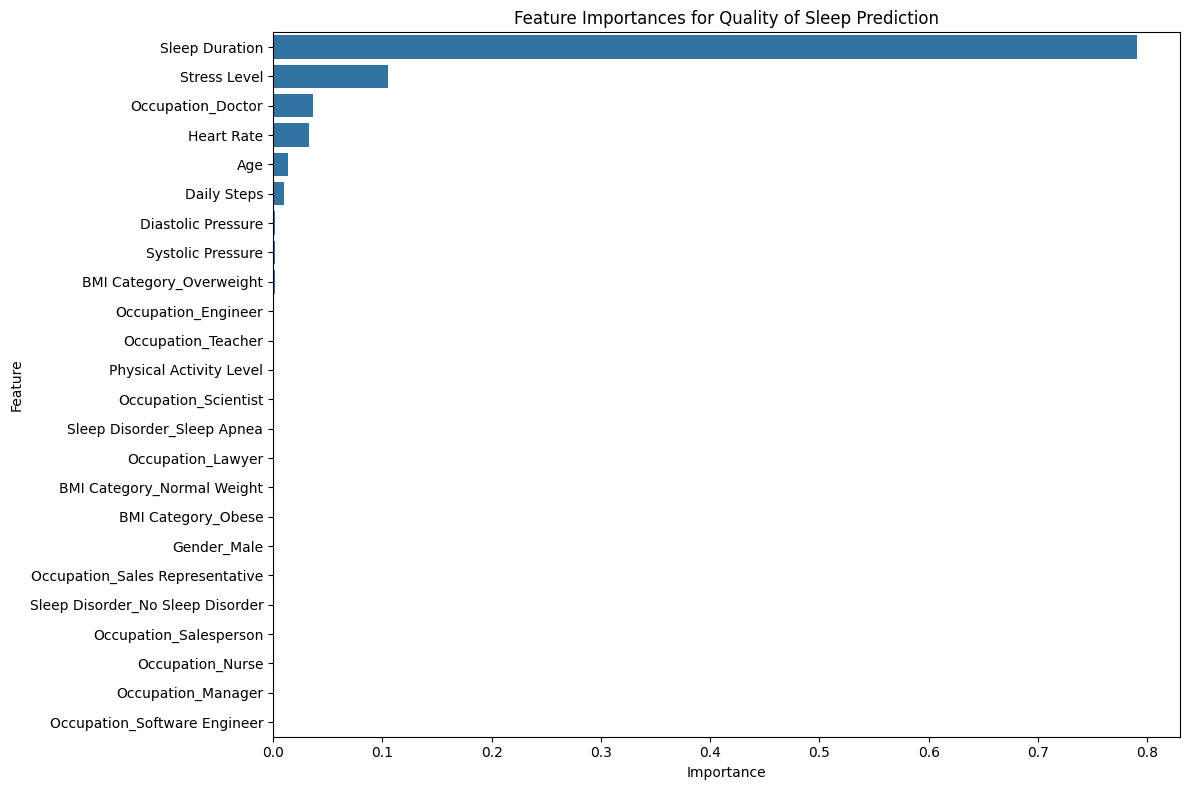

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top N feature importances
print("Top 10 Feature Importances:")
display(features_df.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances for Quality of Sleep Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Análisis de Resultados del Modelo y Discusión

El modelo `RandomForestRegressor` fue entrenado exitosamente para predecir la `Quality of Sleep` (Calidad del Sueño) y mostró un rendimiento muy sólido en el conjunto de prueba:

- **R-squared (R²):** 0.9823
- **Mean Absolute Error (MAE):** 0.0457
- **Mean Squared Error (MSE):** 0.0268

Estos métricas indican que el modelo explica aproximadamente el 98.23% de la varianza en la calidad del sueño y que sus predicciones están, en promedio, muy cerca de los valores reales (MAE bajo).

### Importancia de las Características

El análisis de la importancia de las características del modelo reveló que las variables más influyentes en la predicción de la `Quality of Sleep` son:

1.  **Sleep Duration (Duración del Sueño):** Con una importancia de aproximadamente 0.79, es, con diferencia, el factor más crucial. Esto es intuitivamente lógico y refuerza la correlación directa entre la cantidad de sueño y su percepción de calidad.
2.  **Stress Level (Nivel de Estrés):** Con una importancia de aproximadamente 0.105, el nivel de estrés es el segundo factor más relevante. Esto subraya la fuerte conexión entre el bienestar mental y la calidad del sueño, un hallazgo común en la investigación del sueño.
3.  **Occupation_Doctor (Ocupación: Doctor):** Esta variable categórica tiene una importancia de aproximadamente 0.036. Esto sugiere que ser doctor tiene un impacto notable en la calidad del sueño, posiblemente debido a horarios irregulares, altos niveles de estrés, o turnos largos, lo que se alinea con la discusión de factores de estilo de vida.
4.  **Heart Rate (Frecuencia Cardíaca):** Con una importancia de aproximadamente 0.033, la frecuencia cardíaca es un indicador cardiovascular significativo. Esto resalta cómo la salud cardiovascular, un componente fisiológico directo, afecta la calidad del sueño, posiblemente reflejando la actividad del sistema nervioso autónomo.
5.  **Age (Edad):** Con una importancia de aproximadamente 0.014, la edad también influye, lo cual es consistente con la literatura que indica cambios en los patrones de sueño a lo largo de la vida.
6.  **Daily Steps (Pasos Diarios):** Con una importancia de aproximadamente 0.0098, la actividad física moderada también contribuye, lo cual es un factor de estilo de vida conocido por mejorar el sueño.

Otros factores como `Diastolic Pressure`, `Systolic Pressure`, `BMI Category_Overweight`, y `Occupation_Engineer` también mostraron cierta importancia, aunque en menor medida. Las presiones sistólica y diastólica son directamente indicadores de salud cardiovascular, y su presencia, aunque menor que la frecuencia cardíaca, refuerza la influencia de la salud cardiovascular en el sueño. La categoría `BMI Category_Overweight` también es un factor de estilo de vida que puede afectar la respiración y, por ende, la calidad del sueño.

### Conclusión

Los resultados del modelo confirman que la `Quality of Sleep` está fuertemente influenciada por una combinación de factores de estilo de vida y salud cardiovascular. La `Duración del Sueño` y el `Nivel de Estrés` son los predictores más dominantes, seguidos de cerca por indicadores fisiológicos como la `Frecuencia Cardíaca` y factores demográficos como la `Edad`. La ocupación (`Doctor`) y el nivel de actividad física (`Pasos Diarios`) también juegan un papel importante, mientras que las métricas de `Presión Arterial` y `Categoría de IMC` muestran una contribución menor pero discernible. Estos hallazgos son consistentes con las correlaciones esperadas y proporcionan una base sólida para entender los principales impulsores de la calidad del sueño en este conjunto de datos.

## Final Task

### Subtask:
Present the model results, including feature importance and evaluation metrics, and discuss how lifestyle and cardiovascular health factors influence sleep quality, referencing previously identified correlations.


## Summary:

### Data Analysis Key Findings

*   The `RandomForestRegressor` model demonstrated strong performance in predicting sleep quality, achieving an R-squared of 0.9823, a Mean Absolute Error (MAE) of 0.0457, and a Mean Squared Error (MSE) of 0.0268 on the test set. These metrics indicate that the model explains approximately 98.23% of the variance in sleep quality, with very accurate predictions.
*   **Sleep Duration** emerged as the most significant predictor of sleep quality, accounting for approximately 79% of the feature importance.
*   **Stress Level** was identified as the second most influential factor, contributing about 10.5% to the feature importance, highlighting the strong link between mental well-being and sleep.
*   Several other factors showed notable importance:
    *   **Occupation\_Doctor** (approx. 3.6%)
    *   **Heart Rate** (approx. 3.3%)
    *   **Age** (approx. 1.4%)
    *   **Daily Steps** (approx. 0.98%)
*   Other lifestyle and cardiovascular factors such as `Diastolic Pressure`, `Systolic Pressure`, `BMI Category_Overweight`, and `Occupation_Engineer` also contributed, albeit with lower importance.

### Insights or Next Steps

*   The analysis confirms that sleep quality is primarily driven by the duration of sleep and stress levels, with cardiovascular health indicators (Heart Rate) and lifestyle choices (Occupation, Daily Steps) also playing significant roles. This provides a clear hierarchy of factors for intervention.
*   Further research could explore the specific mechanisms through which "Occupation\_Doctor" impacts sleep quality, perhaps by analyzing work schedules, stress levels unique to the profession, or access to sleep hygiene resources.
